This project, undertaken as part of my internship at Internee.pk, aims to analyze sales data to identify patterns, trends, and factors affecting sales performance. The dataset for this analysis is sourced from Kaggle and contains various attributes such as order details, shipping information, customer demographics, product categories, and sales figures.

The primary objectives of the project are to:

1. **Analyze Sales Data**: Identify and understand patterns and trends in sales over time, including seasonal variations and year-over-year growth.

3. **Product Analysis**: Evaluate the performance of different products, categories, and sub-categories to identify high-performing and high-sales items.

Using various data analysis techniques and visualization tools, the project reveals insights such as:

- **Sales Trends**: Identified significant sales trends and seasonal patterns over the years and months.
- **Customer Insights**: Highlighted the top customers contributing to sales and segmented them for targeted marketing strategies.
- **Product Performance**: Determined the best-selling and most profitable products, categories, and sub-categories.


The findings from this project provide actionable insights and strategic recommendations to improve sales performance, such as focusing on high-performing products and targeting key customer segments.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

**1. Data Cleaning and Preparation**

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
Order Date,,,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


In [ ]:
df.shape

(9800, 18)

In [ ]:
df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9796,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9797,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9798,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum().sum()

11

In [ ]:
pd.isnull(df).sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
data=df.dropna(inplace = True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name     Sales  
0       Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2          Labels  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3          Tables      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4         Storage                     Eldon Fold 'N Roll Cart System   22.3680  
...           ...                                                ...       ...  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.7980  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.3680  
9797       Phones                                        GE 30524EE4  235.1880  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.3760  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.3840  

[9789 rows x 18 columns]>

In [ ]:
df.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


In [ ]:

# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Extract year and month from 'Order Date'
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10


**2. Exploratory Data Analysis (EDA)**

*2.1 Sales Over Time*

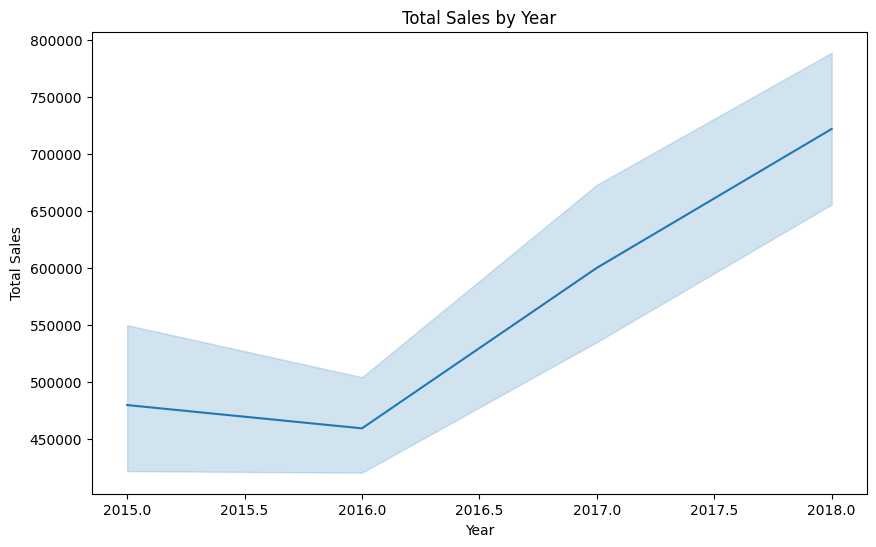

In [ ]:
# Sales by Year
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Order Year', y='Sales', estimator='sum')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

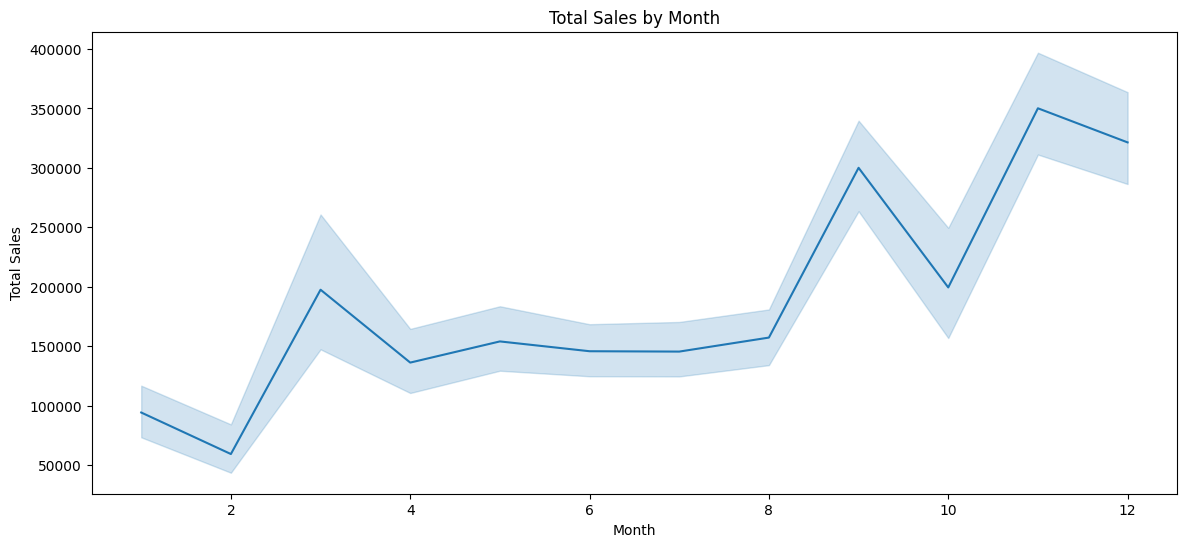

In [ ]:
# Sales by Month
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Order Month', y='Sales', estimator='sum')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

*2.2 Sales by Category and Sub-Category*

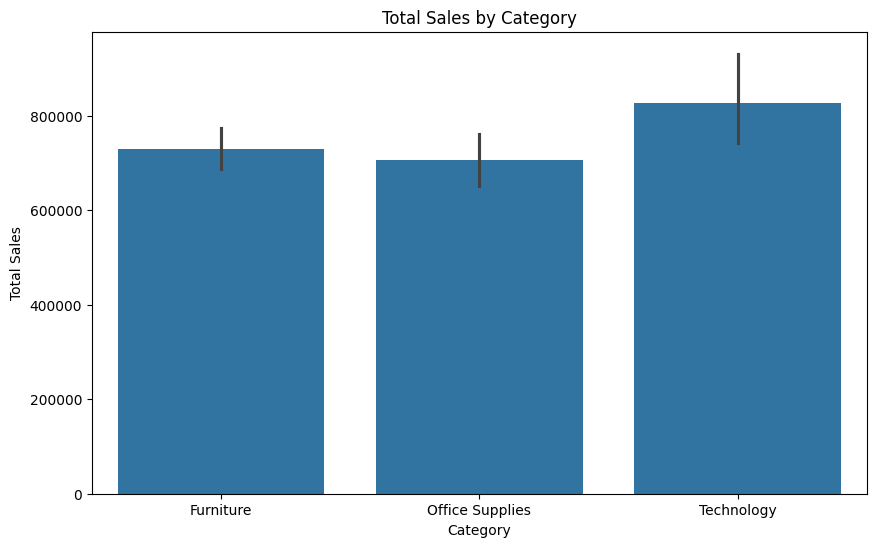

In [ ]:
# Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Sales', estimator='sum')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

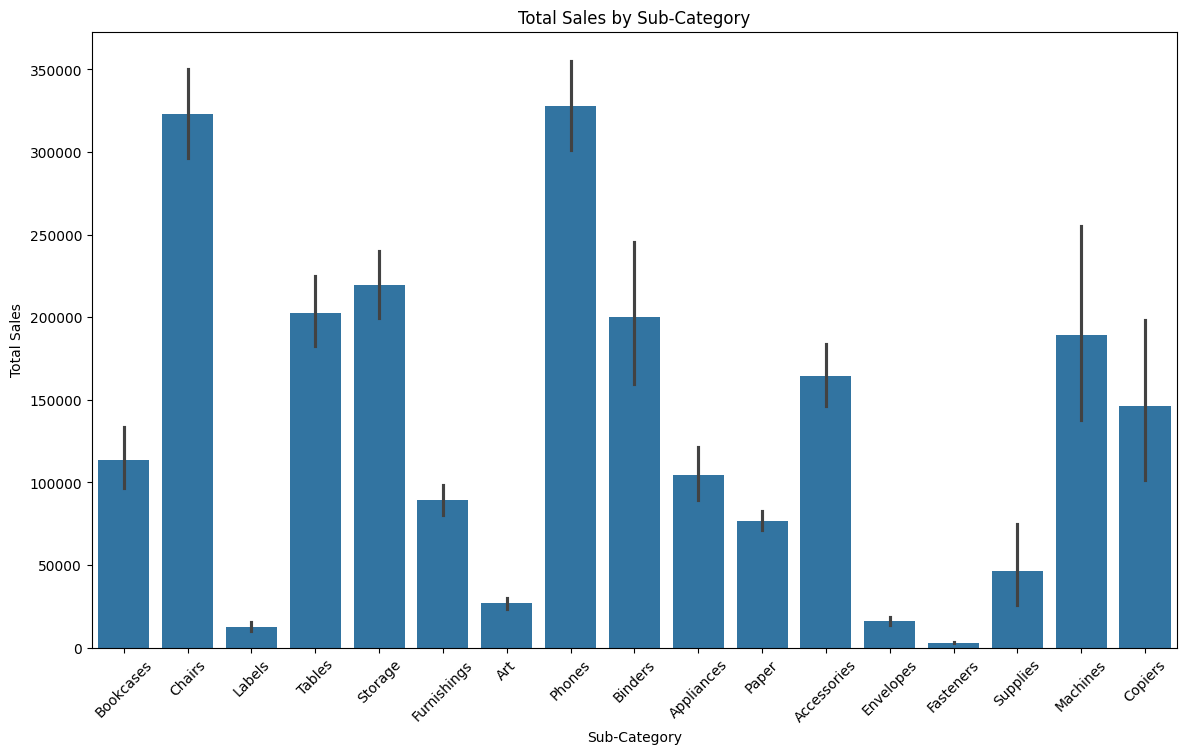

In [ ]:
# Sales by Sub-Category
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Sub-Category', y='Sales', estimator='sum')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

*2.3 Sales by Region*

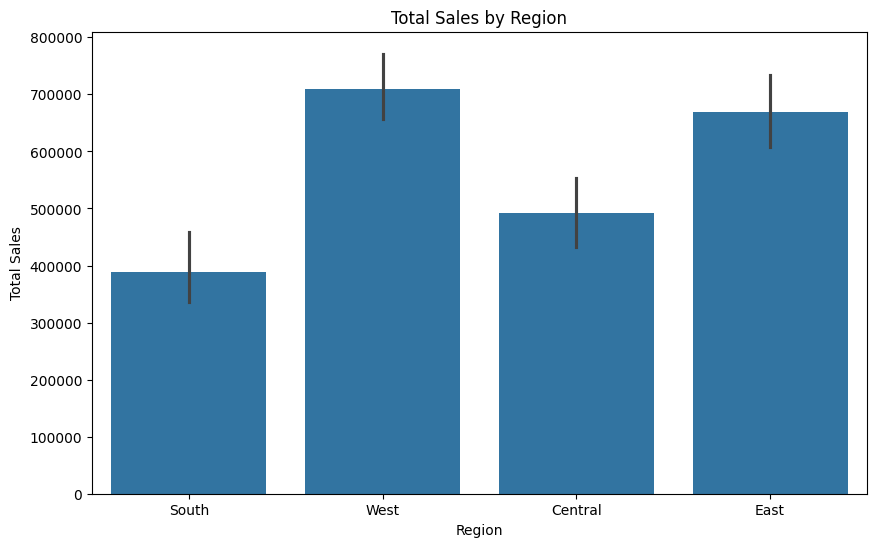

In [ ]:
# Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Sales', estimator='sum')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

*2.4 Sales by Customer Segment*

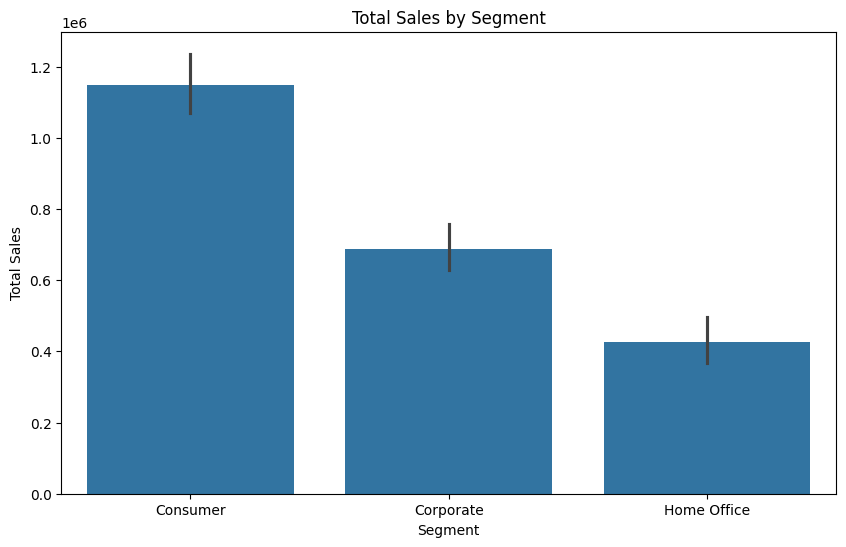

In [ ]:
# Sales by Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Segment', y='Sales', estimator='sum')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

*2.5 Top 10 Customers by Sales*

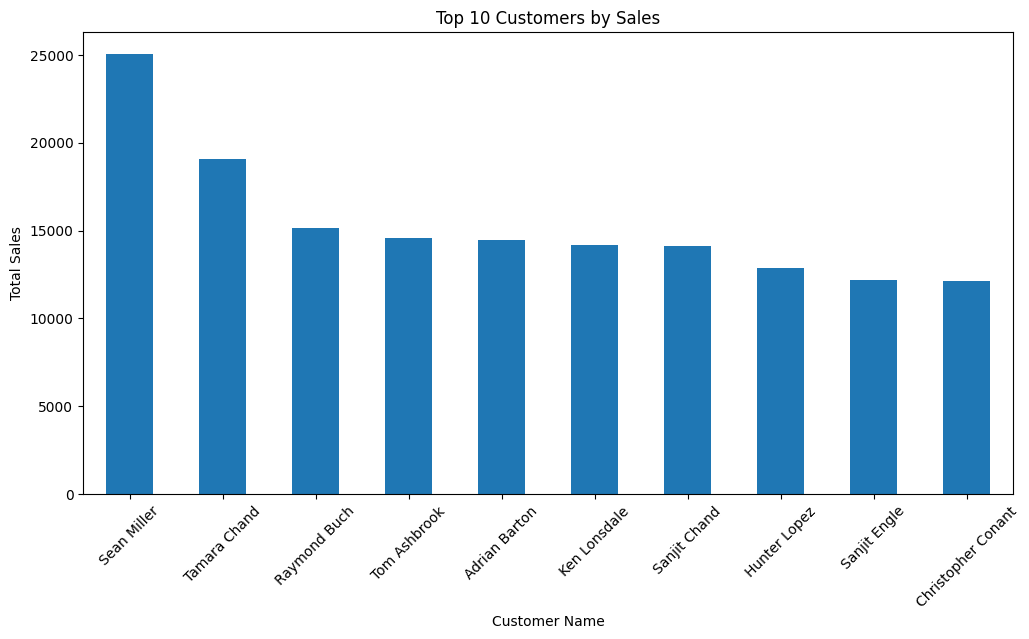

In [ ]:
# Top 10 customers by sales
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top 10 customers
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

*2.5 Top 10 Products by Sales*

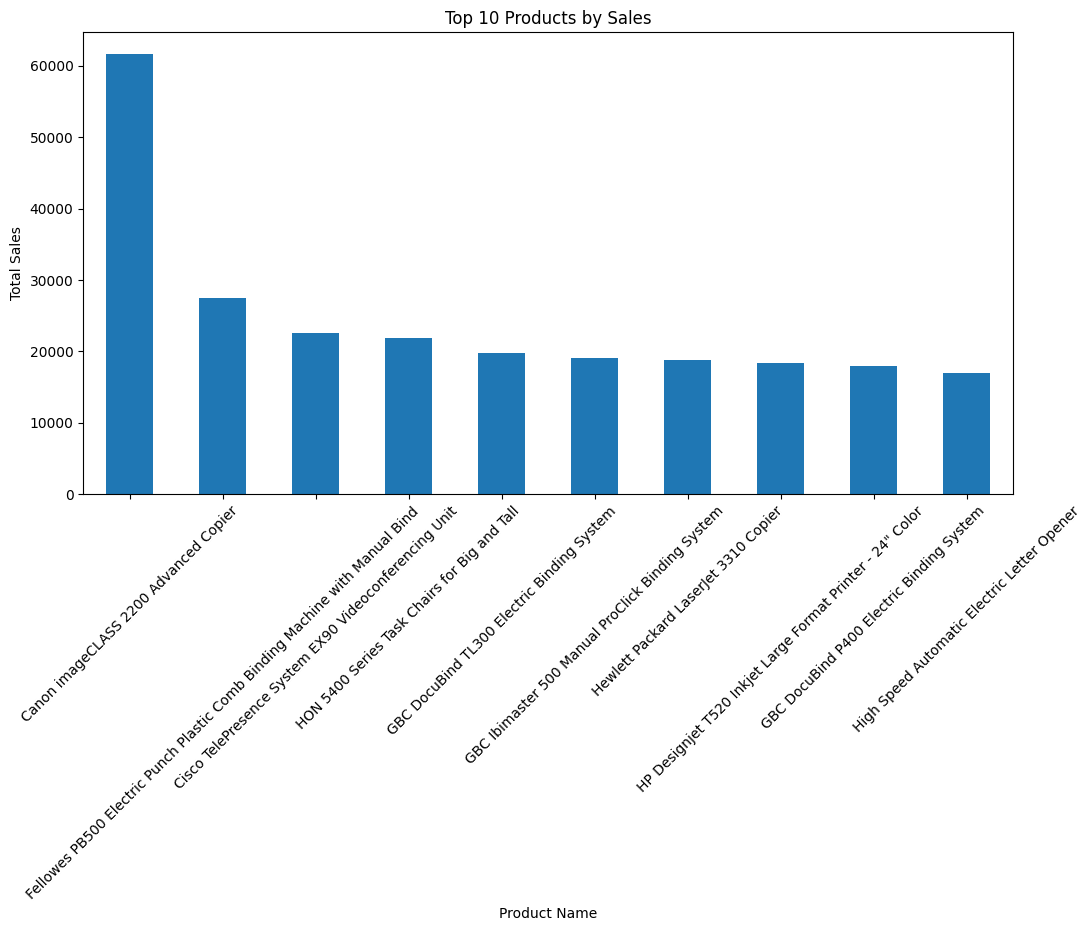

In [ ]:
# Top 10 products by sales
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top 10 products
plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

**3. Analyzing Trends, Patterns and Seasonality**

*3.1 Correlation Analysis*

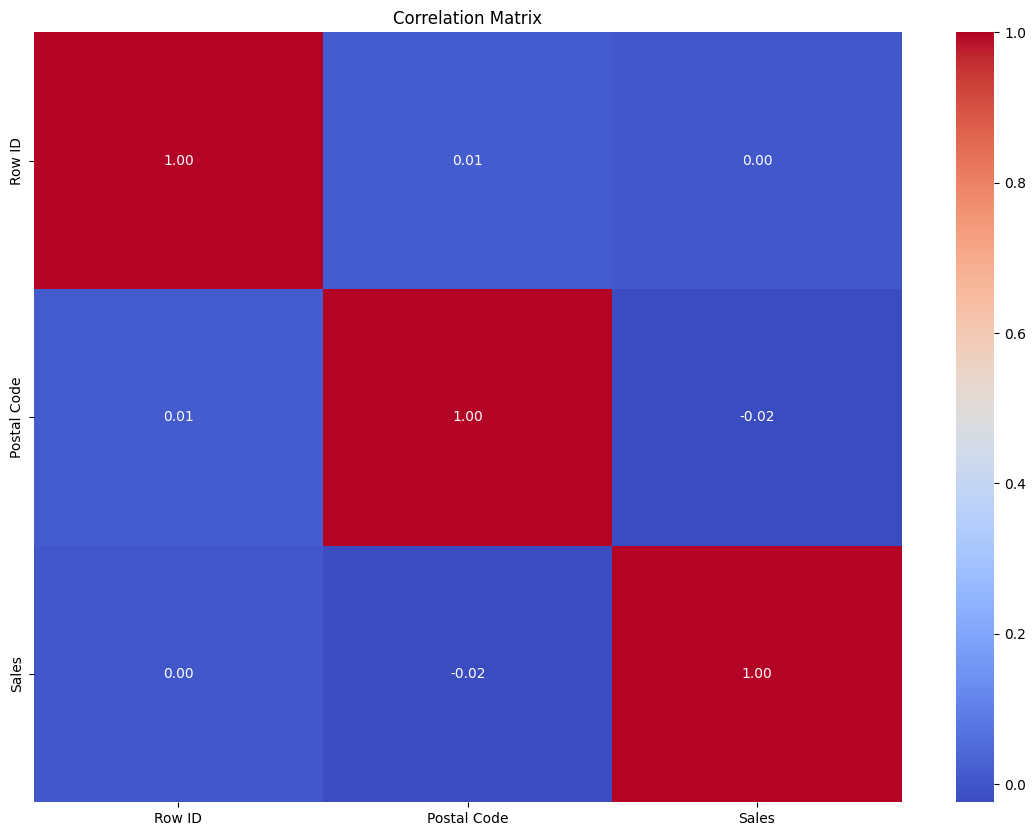

In [ ]:
# Convert 'Ship Mode', 'Segment', 'Country', 'Region', 'Category', and 'Sub-Category' to numerical values using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sub-Category'], drop_first=True)

# Select only numeric columns for correlation analysis
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_encoded[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

*3.2 Trends and Seasonality Analysis*

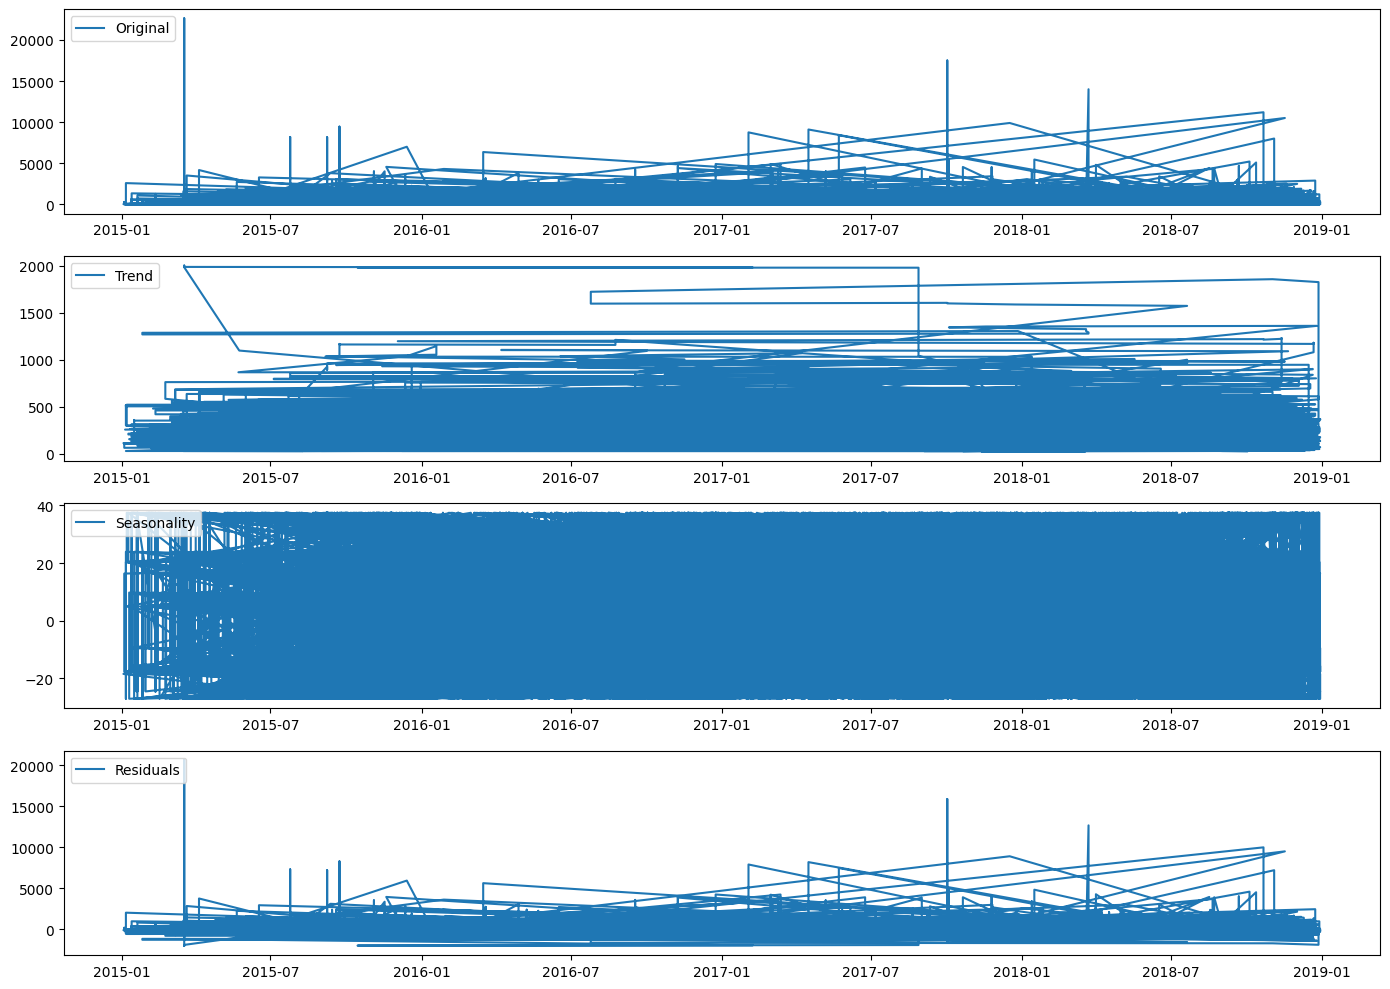

In [ ]:
# Decompose the sales time series
df.set_index('Order Date', inplace=True)
decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

*3.3 Interpretation*

**Trend:** The trend component shows a slight upward trend in sales over the past four and a half years. However, there appears to be a flattening out in the last year or so. This suggests that sales growth may be slowing down.

**Seasonality:** The seasonality component shows a cyclical pattern, with peaks in the winter months (around January) and lows in the summer months (around July). This suggests that there is a seasonal component to the sales data, with more sales occurring in the winter.

**Residuals:** The residuals component shows the random fluctuations in the data that are not captured by the trend or seasonality. The residuals appear to be random and relatively evenly distributed around zero.

**4. Strategies and Improvement**

**Identify the reasons for the seasonal sales pattern:** By understanding why sales are higher in the winter, businesses can develop targeted marketing campaigns or promotions to boost sales during the slower summer months. For example, a clothing store might offer discounts on winter gear in the summer.

**Develop marketing campaigns that target specific seasons:**  Businesses can use the information from the seasonality component to develop marketing campaigns that are tailored to the specific needs and wants of consumers during different times of the year. For example, a toy store might run a back-to-school marketing campaign in the summer months.

**Investigate why sales growth appears to be slowing:** The flattening trend in the sales data suggests that there may be some underlying factors that are limiting sales growth. Businesses should investigate these factors and develop strategies to address them. This could involve investing in new products or marketing campaigns, or improving customer service.

**Target Top Customers and Product:** Use some marketing techniques to attract more sales.